In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File


In [2]:
nameCSV = 'C_B_G_file.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]

## Calculate mean value of each satellite track 

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2205


In [4]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

2.700812578201294 1985-04-01 07:44:52.125977
2.226555824279785 1985-04-24 09:24:40.746528
1.666750192642212 1985-05-17 11:04:17.078125
2.5757501125335693 1985-05-20 11:13:06.295898
1.2649999856948853 1985-06-26 02:58:29.750487
2.4064617156982417 1985-07-05 14:32:17.463942
1.848000168800354 1985-07-28 16:11:55.262498
2.2143335342407227 1985-07-31 16:20:42.515627
0.5731765031814575 1985-09-15 19:39:47.702207
1.6660001277923584 1985-10-08 21:19:13.951173
1.3996667861938477 1985-10-31 22:58:29.697917
2.231799840927124 1985-11-03 23:07:14.012499
1.0398334264755251 1985-12-10 14:51:42.582031
0.6495000123977661 1985-12-13 15:00:26.898441
0.625 1986-01-02 16:30:52.937502
0.8496250510215759 1986-01-12 04:04:35.771729
2.6090712547302246 1986-01-28 18:18:44.251115
1.4392000436782837 1986-02-04 05:43:40.249478
2.091571569442749 1986-02-27 07:22:40.318080
2.407249927520752 1986-03-02 07:31:23.163085
3.2320001125335693 1986-03-22 09:01:36.468749
2.7468183040618896 1986-03-25 09:10:20.336648
0.926411

3.574500322341919 2002-04-05 22:24:01.833333
2.430222511291504 2002-04-06 18:38:18.812502
1.9296000003814695 2002-04-10 08:00:05.960546
1.6480001211166382 2002-04-14 12:29:08.150276
1.9225000143051147 2002-04-15 20:22:32.658854
1.4525001049041748 2002-04-20 05:58:40.080078
1.114400029182434 2002-04-23 19:51:07.721876
1.3780001401901243 2002-04-25 18:21:03.174480
1.388647198677063 2002-04-26 23:59:13.094668
2.9068889617919917 2002-04-30 03:57:06.050129
2.186333417892456 2002-05-05 16:19:33.494792
2.0403501987457275 2002-05-10 01:55:37.306104
1.1117143630981443 2002-05-15 14:18:05.370535
1.2881765365600586 2002-05-19 12:29:14.513787
1.2198333740234375 2002-05-25 12:16:37.549479
1.592333436012268 2002-05-27 22:16:50.402776
2.736250400543213 2002-05-29 21:52:41.743750
2.6718125343322754 2002-06-07 04:15:08.902832
1.371000051498413 2002-06-08 19:51:21.628126
2.1123688220977783 2002-06-18 17:49:45.226974
3.609000205993652 2002-06-20 10:51:25.890621
2.0731430053710938 2002-06-23 12:00:54.6802

1.9285334348678589 2011-10-21 23:37:23.253125
1.7905455502596768 2011-10-23 15:53:16.225852
0.8475882586310891 2011-10-25 15:50:47.272059
0.7132857186453683 2011-10-26 18:57:25.535645
0.7182353524600759 2011-10-27 03:36:57.167049
0.9172000885009766 2011-10-30 15:21:30.789062
1.1204286302839006 2011-11-05 03:43:58.558037
1.3957500457763672 2011-11-07 12:09:24.546872
1.3070001148042223 2011-11-09 13:20:03.029018
1.1696666876475017 2011-11-15 01:42:30.366861
1.6408668756484983 2011-11-18 12:06:13.778125
1.6072000503540038 2011-11-19 11:18:34.618360
1.27346670627594 2011-11-20 23:37:35.856250
1.393764720243566 2011-11-21 14:28:21.396140
1.1224286215645929 2011-11-24 23:41:02.426339
0.9752353219424976 2011-11-25 02:12:02.850643
1.5806500434875488 2011-11-29 09:17:06.580077
1.4870001929146903 2011-12-04 21:39:33.013394
3.3224003314971924 2011-12-07 12:09:35.842187
1.9475715273902532 2011-12-09 07:15:37.360119
1.6794286455426897 2011-12-14 19:38:04.303572
2.521533489227295 2011-12-18 12:06:24

0.5971764957203585 2018-07-26 01:26:14.318359
1.03209096735174 2018-07-28 01:23:45.269087
0.9691667556762696 2018-07-30 05:39:57.897136
0.963400173187256 2018-08-03 15:16:01.812499
0.7747500896453857 2018-08-04 03:54:58.078311
1.072619120279948 2018-08-05 14:08:06.305060
1.5114119052886963 2018-08-07 23:32:00
1.2988571439470564 2018-08-09 03:38:29.014510
1.7142501831054688 2018-08-13 13:14:32.871875
0.9342857769557408 2018-08-19 01:36:59.748745
2.1865294961368336 2018-08-20 12:17:35.875460
2.56181263923645 2018-08-21 00:25:13.248031
1.982444551255968 2018-08-22 10:38:17.397568
1.189650058746338 2018-08-23 11:13:03.801562
1.1811176748836745 2018-08-24 00:01:22.642941
1.1878334681193037 2018-08-28 23:35:31.624998
1.5695884227752686 2018-08-31 11:59:54
0.5479500770568848 2018-09-02 09:11:36.057811
1.4014118909835815 2018-09-03 23:31:58
1.2930000850132533 2018-09-07 21:34:04.020091
1.4327001571655271 2018-09-12 07:10:08.003126
1.895666758219401 2018-09-17 19:32:35.937502
1.5158824920654297

In [5]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [6]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2205


## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [7]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [8]:
T = waveperiod(wh[days],ws[days])
print T
print len(T)
T

[6.77643209 6.61147856 6.43733401 ... 5.64967776 5.2767476  5.61217235]
2205


array([6.77643209, 6.61147856, 6.43733401, ..., 5.64967776, 5.2767476 ,
       5.61217235])

## Make list for each month

In [9]:
#Sunday 8.9.19

In [10]:
#wave height
janwh = []
febwh = []
marwh = []
aprwh = []
maywh = []
junwh = []
julwh = []
augwh = []
sepwh = []
octwh = []
novwh = []
decwh = []


#time
jantime = []
febtime = []
martime = []
aprtime = []
maytime = []
juntime = []
jultime = []
augtime = []
septime = []
octtime = []
novtime = []
dectime = []


#wind speed
janws = []
febws = []
marws = []
aprws = []
mayws = []
junws = []
julws = []
augws = []
sepws = []
octws = []
novws = []
decws = []


#backscatter
janbs = []
febbs = []
marbs = []
aprbs = []
maybs = []
junbs = []
julbs = []
augbs = []
sepbs = []
octbs = []
novbs = []
decbs = []

In [11]:
for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    
    if dt.month == 1:
        janwh.append(np.mean(wh[days[k]:days[k+1]]))
        jantime.append(tt[days[k]])
        janws.append(np.mean(ws[days[k]:days[k+1]]))
        janbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 2:
        febwh.append(np.mean(wh[days[k]:days[k+1]]))
        febtime.append(tt[days[k]])
        febws.append(np.mean(ws[days[k]:days[k+1]]))    
        febbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 3:
        marwh.append(np.mean(wh[days[k]:days[k+1]]))
        martime.append(tt[days[k]])
        marws.append(np.mean(ws[days[k]:days[k+1]]))
        marbs.append(np.mean(back[days[k]:days[k+1]]))            
            
    if dt.month == 4:
        aprwh.append(np.mean(wh[days[k]:days[k+1]]))
        aprtime.append(tt[days[k]])
        aprws.append(np.mean(ws[days[k]:days[k+1]]))
        marbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 5:
        maywh.append(np.mean(wh[days[k]:days[k+1]]))
        maytime.append(tt[days[k]])
        mayws.append(np.mean(ws[days[k]:days[k+1]]))
        maybs.append(np.mean(back[days[k]:days[k+1]]))

    if dt.month == 6:
        junwh.append(np.mean(wh[days[k]:days[k+1]]))
        juntime.append(tt[days[k]])
        junws.append(np.mean(ws[days[k]:days[k+1]]))
        junbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 7:
        julwh.append(np.mean(wh[days[k]:days[k+1]]))
        jultime.append(tt[days[k]])
        julws.append(np.mean(ws[days[k]:days[k+1]]))
        julbs.append(np.mean(back[days[k]:days[k+1]]))
               
    if dt.month == 8:
        augwh.append(np.mean(wh[days[k]:days[k+1]]))
        augtime.append(tt[days[k]])
        augws.append(np.mean(ws[days[k]:days[k+1]]))
        augbs.append(np.mean(back[days[k]:days[k+1]]))

    if dt.month == 9:
        sepwh.append(np.mean(wh[days[k]:days[k+1]]))
        septime.append(tt[days[k]])
        sepws.append(np.mean(ws[days[k]:days[k+1]]))
        sepbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 10:
        octwh.append(np.mean(wh[days[k]:days[k+1]]))
        octtime.append(tt[days[k]])
        octws.append(np.mean(ws[days[k]:days[k+1]]))
        octbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 11:
        novwh.append(np.mean(wh[days[k]:days[k+1]]))
        novtime.append(tt[days[k]])
        novws.append(np.mean(ws[days[k]:days[k+1]]))
        novbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 12:
        decwh.append(np.mean(wh[days[k]:days[k+1]]))
        dectime.append(tt[days[k]])
        decws.append(np.mean(ws[days[k]:days[k+1]]))
        decbs.append(np.mean(back[days[k]:days[k+1]]))

In [30]:
# USE THIS! jan = wh, janT=time in jan

for k in range(len(febwh)):
    print febwh[k], netCDF4.num2date(febwh[k],u'days since 1985-01-01 00:00:00 UTC')

1.4392000436782837 1985-01-02 10:32:26.883774
2.091571569442749 1985-01-03 02:11:51.783600
1.2698181867599487 1985-01-02 06:28:32.291336
1.0557222366333008 1985-01-02 01:20:14.401245
2.432333469390869 1985-01-03 10:22:33.611755
2.3398423194885254 1985-01-03 08:09:22.376404
1.624000072479248 1985-01-02 14:58:33.606262
1.6792632341384888 1985-01-02 16:18:08.343430
2.1212856769561768 1985-01-03 02:54:39.082489
2.045684099197388 1985-01-03 01:05:47.106171
1.7645000219345093 1985-01-02 18:20:52.801895
1.8902629613876345 1985-01-02 21:21:58.719864
1.9250000715255735 1985-01-02 22:12:00.006180
1.768105387687683 1985-01-02 18:26:04.305496
0.7800000309944153 1985-01-01 18:43:12.002678
2.5672106742858887 1985-01-03 13:36:47.002258
3.1530001163482666 1985-01-04 03:40:19.210052
1.2813751697540283 1985-01-02 06:45:10.814667
3.276000022888184 1985-01-04 06:37:26.401978
1.7404210567474363 1985-01-02 17:46:12.379303
1.1268571615219116 1985-01-02 03:02:40.458755
1.340947508811951 1985-01-02 08:10:57.86

In [13]:
# df = pd.DataFrame(data={"date": days2})
# df.to_csv("CBG_MONTHSS.csv", sep=',',index=False)
# df

In [14]:
df1 = pd.DataFrame(data={"January":janwh})
df2 = pd.DataFrame(data={"February":febwh})
df3 = pd.DataFrame(data={"March":marwh})
df4= pd.DataFrame(data={"April":aprwh})
df5= pd.DataFrame(data={"May":maywh})
df6= pd.DataFrame(data={"June":junwh})
df7= pd.DataFrame(data={"July":julwh})
df8= pd.DataFrame(data={"August":augwh})
df9= pd.DataFrame(data={"September":sepwh})
df10= pd.DataFrame(data={"October":octwh})
df11= pd.DataFrame(data={"November":novwh})
df12= pd.DataFrame(data={"December":decwh})


df.to_csv("testjanmonth.csv", sep=',',index=False)

In [15]:
df_1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=1)
df_1

January  February     March     April       May      June      July  \
0    0.625000  1.439200  2.407250  2.700813  1.666750  1.265000  2.406462   
1    0.849625  2.091572  3.232000  2.226556  2.575750  1.235474  1.848000   
2    2.609071  1.269818  2.746818  1.992833  0.926412  1.237667  2.214334   
3    1.490111  1.055722  2.327000  3.296143  1.084235  1.750350  2.000875   
4    1.641083  2.432333  1.903350  1.302158  1.044000  0.921000  1.374600   
5    2.276857  2.339842  2.221500  2.168667  1.407650  1.224369  1.784684   
6    1.487455  1.624000  5.297000  2.161143  2.344500  2.625667  2.274167   
7    2.379500  1.679263  2.520000  2.502333  1.261696  1.535833  2.225050   
8    1.202211  2.121286  1.440684  1.237333  2.151000  2.496556  1.799667   
9    1.033400  2.045684  1.694000  1.352053  1.782000  1.746667  1.744286   
10   1.612737  1.764500  2.306474  1.588500  2.140263  1.301834  1.993000   
11   0.886000  1.890263  3.662500  2.317685  1.413000  2.066600  2.767053   
12   1.018895  1.925000  3.211000  2.590334  1.255084  2.103750  2.414500   
13   1.834750  1.768105  3.311200  2.944240  0.551722  1.377833  1.346368   
14   2.520000  0.780000  1.325333  1.237500  1.290333  2.178789  1.395500   
15   1.374316  2.567211  0.934308  1.428800  1.319334  3.247800  1.567734   
16   1.870000  3.153000  0.921000  1.623667  1.860750  2.498235  1.395500   
17   4.010421  1.281375  1.149500  1.562842  1.606167  1.255000  1.724238   
18   2.874143  3.276000  1.829210  2.520000  1.890316  2.326833  0.991167   
19   2.906834  1.740421  2.309167  3.042250  2.411324  1.340948  1.560467   
20   1.711667  1.126857  3.541611  1.307833  3.272316  1.444353  1.044000   
21   2.022222  1.340948  2.578316  1.424000  1.395500  1.887500  1.106364   
22   1.430500  2.501475  1.395500  0.973500  4.485353  1.507263  0.823353   
23   1.397100  3.188056  1.075700  1.708150  2.755947  2.537500  1.465667   
24   2.063333  1.222412  3.346334  1.852500  1.817334  3.025824  1.574467   
25   1.041263  0.991000  2.131400  3.116947  1.629316  1.307800  1.985572   
26   1.446316  2.457773  1.128350  1.507105  2.356526  1.948118  1.566588   
27   1.804572  1.026333  4.313000  0.797667  3.140334  1.679211  1.907000   
28   2.306474  1.202500  3.688369  2.114350  2.854000  1.901421  0.885667   
29   1.879857  1.595882  2.849118  1.290333  2.710100  2.000429  2.414187   
..        ...       ...       ...       ...       ...       ...       ...   
169  0.816628       NaN  2.671000  2.463222  1.210750  1.811200  1.807619   
170  1.189118       NaN  2.109471  4.070222  1.371000  2.552882  0.904500   
171  1.218000       NaN  3.348450  3.388905  1.072458  1.527500  1.783762   
172  1.427375       NaN  3.081533  3.340400  2.043286  1.463000  1.368500   
173  1.315813       NaN       NaN  0.773550  2.162000       NaN  1.392762   
174  0.954000       NaN       NaN  1.698706  1.391000       NaN  0.971857   
175  2.476300       NaN       NaN  1.475000  2.719200       NaN  1.608556   
176  0.860333       NaN       NaN  1.454143  1.943286       NaN  1.687000   
177  1.619250       NaN       NaN  1.153950  2.392192       NaN  1.838318   
178  2.447599       NaN       NaN  2.866286  2.102850       NaN  1.334692   
179  2.631857       NaN       NaN  2.741518  2.447667       NaN  0.790824   
180  1.966750       NaN       NaN       NaN  1.710588       NaN  1.521000   
181  1.431824       NaN       NaN       NaN  0.946000       NaN  1.452000   
182  2.098175       NaN       NaN       NaN  3.576900       NaN  1.630800   
183  2.604876       NaN       NaN       NaN  2.752588       NaN  1.648883   
184  2.214333       NaN       NaN       NaN  1.282250       NaN  1.898833   
185  2.475667       NaN       NaN       NaN  1.862417       NaN  1.314647   
186  1.441824       NaN       NaN       NaN       NaN       NaN  1.163800   
187  1.358524       NaN       NaN       NaN       NaN       NaN  0.660267   
188  1.100167       NaN       NaN       NaN       NaN       NaN  0.730500   
18

In [33]:
x1= np.mean(df1)
x2= np.mean(df2)
x3= np.mean(df3)
x4= np.mean(df4)
x5= np.mean(df5)
x6= np.mean(df6)
x7= np.mean(df7)
x8= np.mean(df8)
x9= np.mean(df9)
x10= np.mean(df10)
x11= np.mean(df11)
x12= np.mean(df12)

In [34]:
print x1
print x2
print x3
print x4
print x5
print x6
print x7
print x8
print x9
print x10
print x11
print x12

January    1.803782
dtype: float64
February    1.962454
dtype: float64
March    2.146758
dtype: float64
April    2.047334
dtype: float64
May    1.894923
dtype: float64
June    1.866896
dtype: float64
July    1.769009
dtype: float64
August    1.613946
dtype: float64
September    1.488259
dtype: float64
October    1.527602
dtype: float64
November    1.515962
dtype: float64
December    1.542683
dtype: float64


In [28]:
means =[x1,
x2,
x3,
x4,
x5,
x6,
x7,
x8,
x9,
x1,
x1,
x1]

In [ ]:
df_1.head()

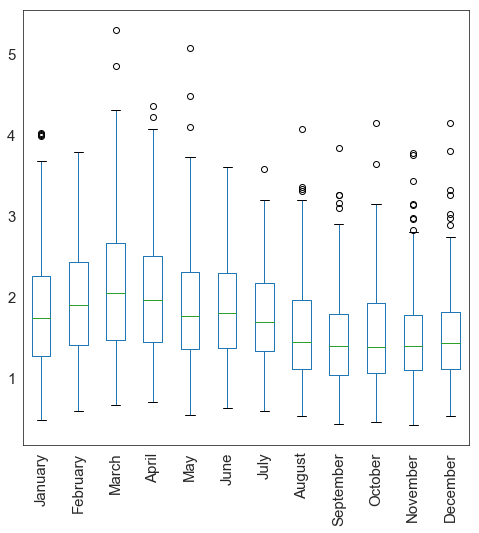

In [23]:
import seaborn as sns
sns.set_style("white")
df_1.boxplot(rot =90, grid=False, fontsize=15, figsize=(8,8))


In [31]:
np.mean(January)

NameError: name 'January' is not defined

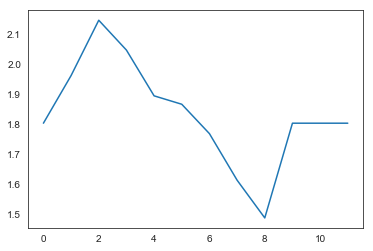

In [29]:
plt.plot(means)

### DIFFERENT METHOD TO CALCULATE MONTHLY AVERAGE WH
## Monthly averages for each year, 12 x 26 years (1993 -2018)


In [35]:
nameCSV = 'CBG_wh_month_vs_year.csv'
no_nan = pd.read_csv(str(nameCSV))
no_nan

January  February     March     April       May      June      July  \
0   1.423928  1.826232  2.618256  2.237213  1.548847  1.499088  1.965571   
1   2.592619  1.919140  2.718494  2.005024  1.428414  1.770222  1.839951   
2   1.611014  2.133001  1.528268  1.902510  1.593380  2.104001  1.208265   
3   1.695147  1.837641  2.291546  1.730489  2.525110  1.701379  1.922769   
4   2.386654  1.777115  2.496504  1.707715  2.391618  2.099690  2.020952   
5   2.112282  1.650596  1.992919  2.276292  1.862031  1.832878  1.762393   
6   2.041262  2.647134  1.670977  2.186097  2.391450  1.937543  2.494005   
7   1.579673  2.267825  1.809119  2.458024  2.138750  2.301353  1.503070   
8   1.943673  2.391650  1.949850  2.329546  1.435458  1.880093  1.909116   
9   1.898627  1.423611  1.978320  1.974526  1.739285  2.303678  1.699031   
10  1.740291  1.443424  2.046385  1.313667  2.451713  1.756894  1.810317   
11  1.818778  1.700016  2.000138  1.691219  1.708824  2.251745  2.101727   
12  1.594564  1.815125  2.275970  2.113181  2.170394  1.671685  1.583010   
13  1.990741  1.761207  2.079895  2.171542  2.242717  2.224572  2.137619   
14  1.591644  2.277509  2.364762  1.910037  2.038523  1.504556  2.922533   
15  2.054628  2.685311  2.331904  1.907419  2.002630  2.342176  1.632626   
16  1.816436  2.058276  2.510745  2.092781  1.803292  1.514955  1.711905   
17  1.296053  1.891670  2.236450  2.100261  1.697979  1.890957  1.785526   
18  2.338574  2.013100  1.777733  1.865149  1.849732  1.621888  1.649575   
19  1.883590  1.592287  2.161650  2.332905  1.848545  2.359586  2.183303   
20  1.673759  2.099506  2.534150  1.709527  1.775714  1.701941  2.181221   
21  2.242280  1.958847  2.291480  1.816991  1.985171  1.432613  1.821647   
22  1.611119  2.217011  1.666260  1.630955  1.945503  2.046013  1.786622   
23  1.583173  2.138350  1.718980  2.049922  1.207738  1.714411  1.627128   
24  1.541264  1.448711  1.818978  2.435898  1.839613  1.909030  1.404224   
25  1.415029  2.177663  2.903292  2.339219  2.091991  1.765945  1.146612   

      August  September   October  November  December  
0   1.602388   1.522185  1.167679  1.181066  1.656030  
1   1.685075   1.718941  1.422079  1.275557  1.594049  
2   1.752572   1.312784  1.266725  1.604345  1.525462  
3   1.155161   1.224209  1.599826  1.564462  1.631107  
4   1.680745   1.433651  1.436637  1.310441  1.654827  
5   2.002715   1.995186  1.844890  1.671438  1.770287  
6   1.791701   1.852994  1.468698  1.724725  1.949070  
7   1.801043   1.219322  1.865443  1.605727  1.464112  
8   1.469330   1.449498  1.268992  1.361198  1.383973  
9   1.770985   1.255488  2.246463  1.312673  1.758839  
10  1.882126   1.050267  1.597683  1.689569  0.886222  
11  1.360394   1.436175  2.136699  1.747517  1.455302  
12  1.296486   1.578470  1.315017  0.924512  1.436857  
13  2.942029   1.397400  1.610025  1.667540  1.477656  
14  2.113281   1.703676  1.287021  1.726310  1.392363  
15  1.559337   1.777882  1.631799  1.397371  0.989380  
16  1.502654   1.643786  1.479026  1.469504  1.318885  
17  1.279007   1.280983  1.776700  2.222997  1.435866  
18  1.764399   1.457095  1.409124  1.326042  2.436818  
19  1.414327   1.196637  1.611481  1.285823  1.367849  
20  1.334561   1.807593  1.298274  1.462742  1.359007  
21  1.988705   1.501792  1.290714  1.427706  1.479997  
22  1.179168   1.544268  1.847410  1.107903  1.562907  
23  1.998311   1.258332  1.331389  1.651416  1.343204  
24  1.580965   1.374924  1.499206  1.840851  1.381029  
25  1.437754   1.568799  1.530308  1.527879  2.163389

In [36]:
y1= np.mean(no_nan['January'])
y2= np.mean(no_nan['February'])
y3= np.mean(no_nan['March'])
y4= np.mean(no_nan['April'])
y5= np.mean(no_nan['May'])
y6= np.mean(no_nan['June'])
y7= np.mean(no_nan['July'])
y8= np.mean(no_nan['August'])
y9= np.mean(no_nan['September'])
y10= np.mean(no_nan['October'])
y11= np.mean(no_nan['November'])
y12= np.mean(no_nan['December'])

In [37]:
print y1, 'January'
print y2, 'February'
print y3, 'March'
print y4, 'April'
print y5, 'May'
print y6, 'June'
print y7, 'July'
print y8, 'August'
print y9, 'September'
print y10, 'October'
print y11, 'November'
print y12, 'December'

1.82603083727 January
1.96738299015 February
2.1451164255 March
2.01108110604 April
1.91209322546 May
1.88995738646 June
1.83887375469 July
1.66712381454 August
1.48316682738 September
1.54766567573 October
1.50335815731 November
1.53363413181 December


In [39]:
allmonths = [y1,
y2,
y3,
y4,
y5,
y6,
y7,
y8,
y9,
y10,
y11,
y12]

print min(allmonths)
print max(allmonths)

1.48316682738
2.1451164255


In [44]:
DFJ = np.mean([y12,y1,y2])
MAM = np.mean([y3,y4,y5])
JJA = np.mean([y6,y7,y8])
SON = np.mean([y9,y10,y11])

In [50]:
print 'summer:',DFJ
print 'autumn:',MAM
print 'winter:',JJA
print 'spring:',SON

overallfake = np.mean([DFJ, MAM, JJA, SON])
print 'overall fake',overallfake

summer: 1.7756826530769232
autumn: 2.0227635856666666
winter: 1.798651651897436
spring: 1.5113968868076926
overall fake 1.7771236943621795


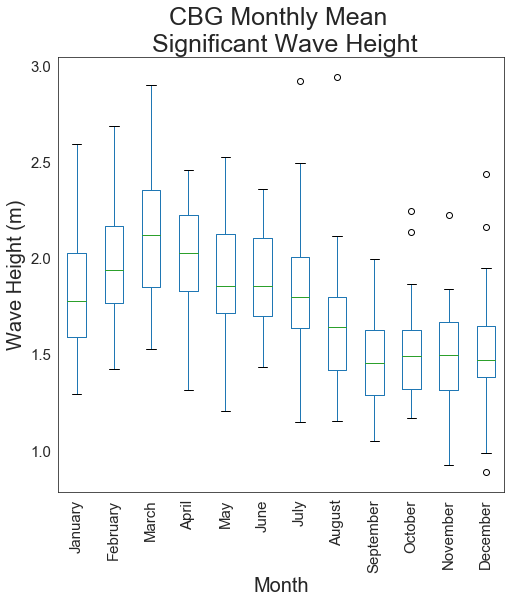

In [40]:
sns.set_style("white")
no_nan.boxplot(rot =90, grid=False, fontsize=15, figsize=(8,8))

plt.ylabel('Wave Height (m)', fontsize=(20))
plt.xlabel('Month', fontsize=(20))
plt.title('CBG Monthly Mean \n Significant Wave Height', fontsize=(25))

plt.savefig('CBG Monthly Wh Boxplot - year vs month')

In [ ]:
a